<a href="https://colab.research.google.com/github/Karthikk0844/EXPAINABLE-AI/blob/main/LAB_06_EXPLAINABLEAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


try:
    import xgboost as xgb
    HAS_XGB = True
except Exception:
    HAS_XGB = False
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
    HAS_IMBLEARN = True
except Exception:
    HAS_IMBLEARN = False

# Deep learning
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models, optimizers
    HAS_TF = True
except Exception:
    HAS_TF = False

# XAI
try:
    import shap
    HAS_SHAP = True
except Exception:
    HAS_SHAP = False
try:
    from lime import lime_tabular
    HAS_LIME = True
except Exception:
    HAS_LIME = False
from sklearn.inspection import PartialDependenceDisplay
import warnings
warnings.filterwarnings('ignore')
print('Libraries loaded. XGBoost:', HAS_XGB, 'Imblearn:', HAS_IMBLEARN, 'TF:', HAS_TF, 'SHAP:', HAS_SHAP, 'LIME:', HAS_LIME)

Libraries loaded. XGBoost: True Imblearn: True TF: True SHAP: True LIME: False


In [ ]:
df = pd.read_csv('/content/new_model.csv')  # adjust path
print(df.columns)
print('Loaded dataset:', df.shape)
print(df.head())

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')
Loaded dataset: (400, 14)
     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
df = pd.read_csv('/content/new_model.csv')
print("Columns:", df.columns)
target_col = 'Class'
print("Class distribution:\n", df[target_col].value_counts())
if len(df[target_col].unique()) < 2:
    raise ValueError("Dataset must contain at least 2 classes.")
X = df.drop(columns=[target_col])
y = df[target_col]

num_features = X.select_dtypes(include=np.number).columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

Columns: Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')
Class distribution:
 Class
1    250
0    150
Name: count, dtype: int64


Part 1: Exploratory Data Analysis (EDA)


---- Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None

---- Missing values ----
Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

Detected target column: class

Targe

,bp,sg,al,su,rbc,bu,sc,sod,pot,hemo,wbcc,rbcc,htn,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


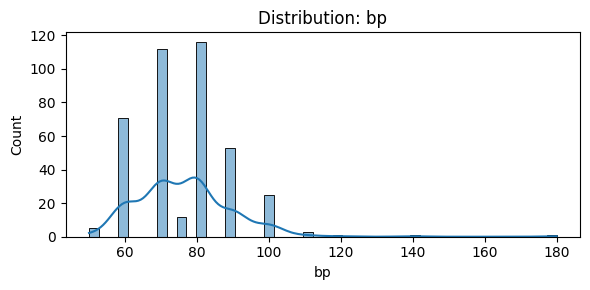

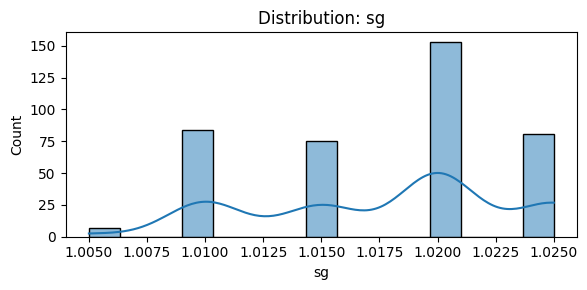

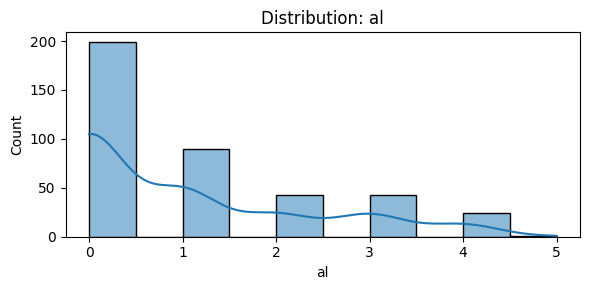

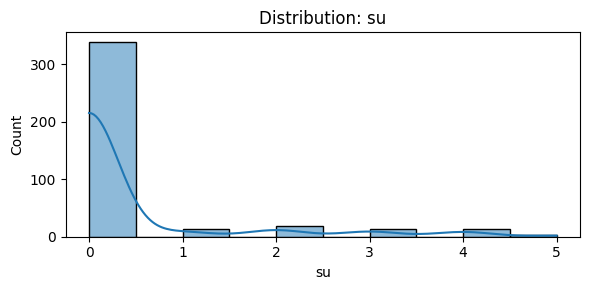

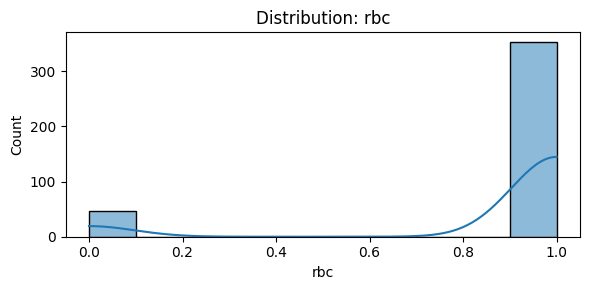

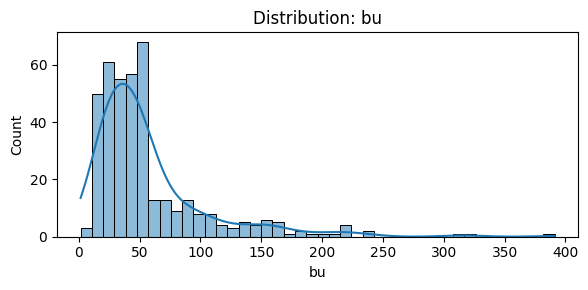

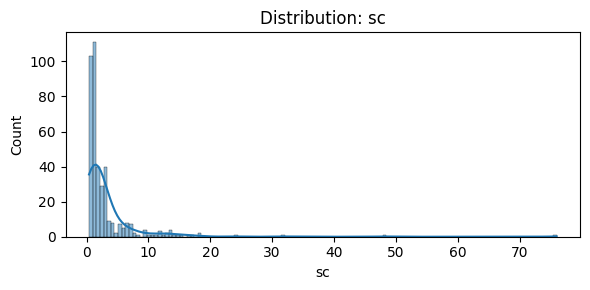

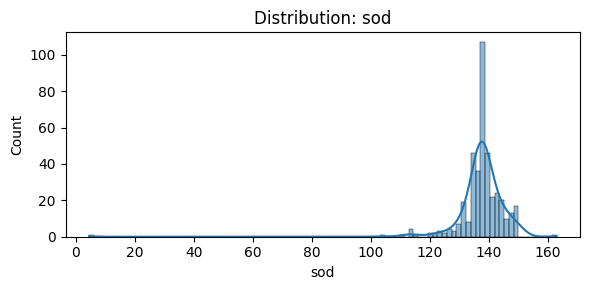

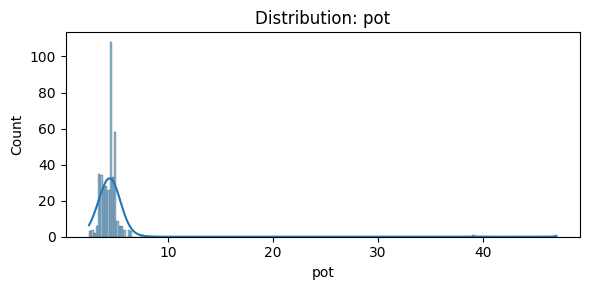

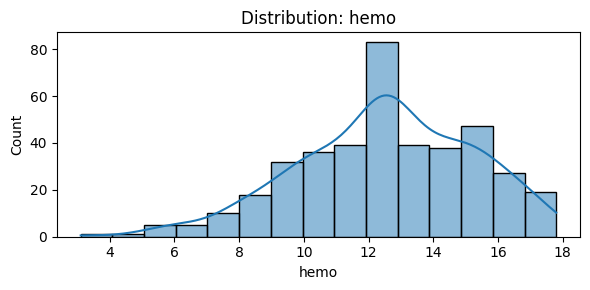

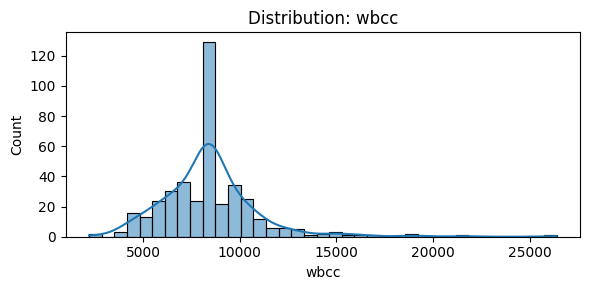

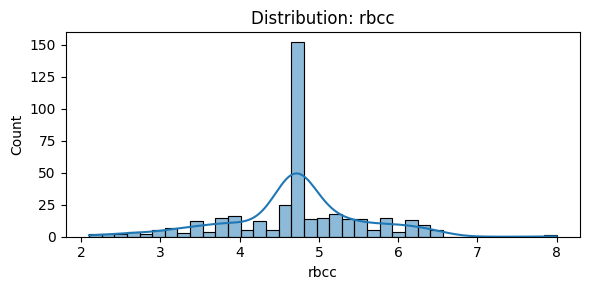

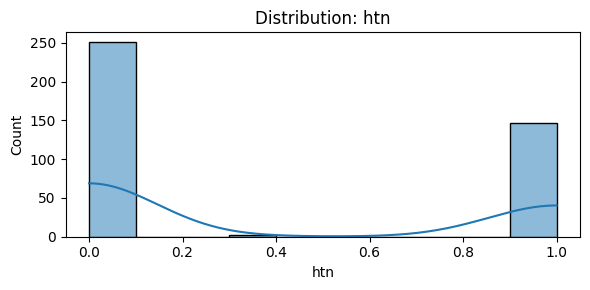

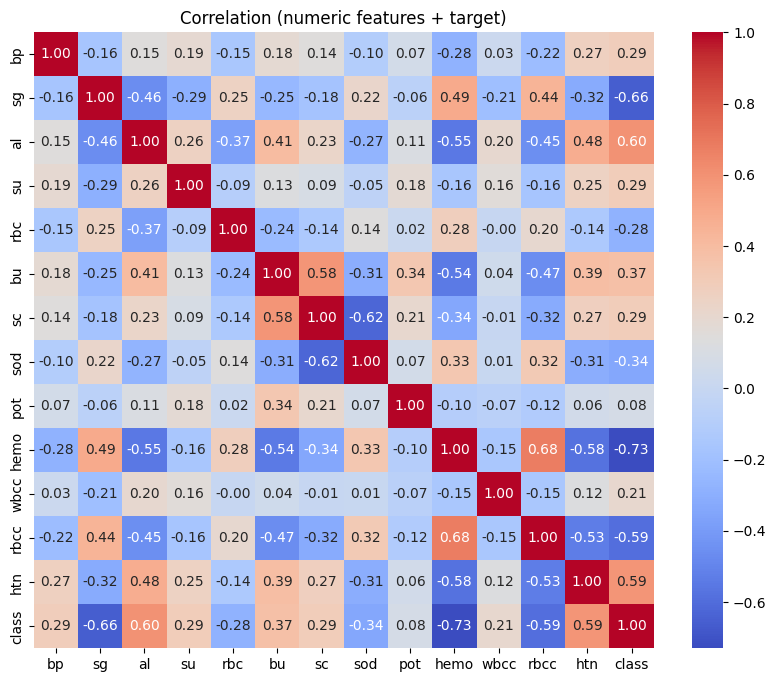


Class balance (fractions):
class
1    0.625
0    0.375
Name: proportion, dtype: float64


In [ ]:
print('\n---- Info ----')
print(df.info())
print('\n---- Missing values ----')
print(df.isna().sum())


df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

possible_targets = ['target','class','ckd','diagnosis','classification','is_kidney_disease','disease']
target_col = None
for t in possible_targets:
    if t in df.columns:
        target_col = t
        break
if target_col is None:
    for c in df.columns:
        if 'class' in c or 'ckd' in c or 'stage' in c:
            target_col = c
            break

if target_col is None:
    raise ValueError('Could not determine target column automatically. Please set target_col variable to the name of the target column in the dataset.')

print('\nDetected target column:', target_col)

print('\nTarget distribution:')
print(df[target_col].value_counts(dropna=False))

if df[target_col].dtype == object:
    mapping = {}
    unique_vals = df[target_col].unique()
    if set(['ckd','notckd','ckd	','notckd	']).intersection(set(unique_vals)):
        mapping = {v: (1 if 'ckd' in v else 0) for v in unique_vals}
    else:
        if len(unique_vals) == 2:
            mapping = {unique_vals[0]:0, unique_vals[1]:1}
    if mapping:
        df[target_col] = df[target_col].map(mapping)

if not np.issubdtype(df[target_col].dtype, np.number):
    le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col].astype(str))

display(df.describe(include='all'))

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in num_cols:
    num_cols.remove(target_col)

for c in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f'Distribution: {c}')
    plt.tight_layout()
    plt.show()

if len(num_cols) > 0:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[num_cols + [target_col]].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation (numeric features + target)')
    plt.show()

print('\nClass balance (fractions):')
print(df[target_col].value_counts(normalize=True))

Part 2: Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Target column was identified as 'class' after lowercasing in a previous step
target_col = "class"

# Create X and y based on the correct target column
X = df.drop(columns=[target_col])
y = df[target_col]

# Determine numeric and categorical features dynamically from the current X
num_features = X.select_dtypes(include=np.number).columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()

print("Class distribution:\n", y.value_counts())

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print('Train/test shapes:', X_train.shape, X_test.shape)

preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print('Processed feature dimension:', X_train_proc.shape)

USE_SMOTE = True
try:
    from imblearn.over_sampling import SMOTE
    if USE_SMOTE and len(np.unique(y_train)) > 1:
        sm = SMOTE(random_state=42)
        X_train_proc, y_train = sm.fit_resample(X_train_proc, y_train)
        print('After SMOTE train shape:', X_train_proc.shape, y_train.shape)
    else:
        print("Skipping SMOTE (only one class present or disabled).")
except ImportError:
    print("imblearn not installed; skipping SMOTE.")

Class distribution:
 class
1    250
0    150
Name: count, dtype: int64
Train/test shapes: (320, 13) (80, 13)
Processed feature dimension: (320, 13)
After SMOTE train shape: (400, 13) (400,)


Part 3: Machine Learning Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# The data (X_train_proc, X_test_proc, y_train, y_test) is already prepared by previous cells.
# Removing redundant data loading and preprocessing.

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

results = {}
for name, clf in models.items():
    print(f'\nTraining {name}...')
    clf.fit(X_train_proc, y_train)
    preds = clf.predict(X_test_proc)
    try:
        probs = clf.predict_proba(X_test_proc)[:,1]
        roc = roc_auc_score(y_test, probs)
    except Exception:
        roc = None
    metrics = {
        'accuracy': accuracy_score(y_test, preds),
        'precision': precision_score(y_test, preds, zero_division=0),
        'recall': recall_score(y_test, preds, zero_division=0),
        'f1': f1_score(y_test, preds, zero_division=0),
        'roc_auc': roc,
        'confusion_matrix': confusion_matrix(y_test, preds)
    }
    results[name] = {'model': clf, 'metrics': metrics}
    print(name, metrics)

summary = pd.DataFrame({k:v['metrics'] for k,v in results.items()}).T
display(summary[['accuracy','precision','recall','f1','roc_auc']])


Training LogisticRegression...
LogisticRegression {'accuracy': 0.975, 'precision': 1.0, 'recall': 0.96, 'f1': 0.9795918367346939, 'roc_auc': np.float64(0.998), 'confusion_matrix': array([[30,  0],
       [ 2, 48]])}

Training DecisionTree...
DecisionTree {'accuracy': 0.9625, 'precision': 0.9795918367346939, 'recall': 0.96, 'f1': 0.9696969696969697, 'roc_auc': np.float64(0.9633333333333334), 'confusion_matrix': array([[29,  1],
       [ 2, 48]])}

Training RandomForest...
RandomForest {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': np.float64(1.0), 'confusion_matrix': array([[30,  0],
       [ 0, 50]])}

Training SVM...
SVM {'accuracy': 0.975, 'precision': 1.0, 'recall': 0.96, 'f1': 0.9795918367346939, 'roc_auc': np.float64(0.9986666666666667), 'confusion_matrix': array([[30,  0],
       [ 2, 48]])}

Training KNN...
KNN {'accuracy': 0.975, 'precision': 1.0, 'recall': 0.96, 'f1': 0.9795918367346939, 'roc_auc': np.float64(0.9886666666666667), 'confusion_matrix': 

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.975,1.0,0.96,0.979592,0.998
DecisionTree,0.9625,0.979592,0.96,0.969697,0.963333
RandomForest,1.0,1.0,1.0,1.0,1.0
SVM,0.975,1.0,0.96,0.979592,0.998667
KNN,0.975,1.0,0.96,0.979592,0.988667
GradientBoosting,0.9875,1.0,0.98,0.989899,1.0


Part 4: Deep Learning Models (Specify Architectures)

In [ ]:
# Step 5: Deep Learning Models
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


tf.random.set_seed(42)


X_train_dense = X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc
X_test_dense = X_test_proc.toarray() if hasattr(X_test_proc, "toarray") else X_test_proc


input_dim = X_train_dense.shape[1]


def compile_and_train(model, X_tr, y_tr, X_val, y_val, epochs=30, batch_size=32):
    model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0)



mlp = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


X_mlp_tr, X_mlp_val, y_mlp_tr, y_mlp_val = train_test_split(
    X_train_dense, y_train.values, test_size=0.1, random_state=42, stratify=y_train.values
)
compile_and_train(mlp, X_mlp_tr, y_mlp_tr, X_mlp_val, y_mlp_val, epochs=30)
preds_mlp = (mlp.predict(X_test_dense).ravel() > 0.5).astype(int)
print("MLP metrics:", accuracy_score(y_test, preds_mlp), f1_score(y_test, preds_mlp))


X_train_seq = X_train_dense.reshape((-1, input_dim, 1))
X_test_seq = X_test_dense.reshape((-1, input_dim, 1))


cnn = models.Sequential([
    layers.Input(shape=(input_dim,1)),
    layers.Conv1D(32, 3, activation='relu'),
    layers.Conv1D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
compile_and_train(cnn, X_train_seq, y_train, X_test_seq, y_test, epochs=20)
preds_cnn = (cnn.predict(X_test_seq).ravel() > 0.5).astype(int)
print("CNN metrics:", accuracy_score(y_test, preds_cnn), f1_score(y_test, preds_cnn))


lstm = models.Sequential([
    layers.Input(shape=(input_dim,1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
compile_and_train(lstm, X_train_seq, y_train, X_test_seq, y_test, epochs=20)
preds_lstm = (lstm.predict(X_test_seq).ravel() > 0.5).astype(int)
print("LSTM metrics:", accuracy_score(y_test, preds_lstm), f1_score(y_test, preds_lstm))


encoding_dim = min(32, input_dim//2 if input_dim>=4 else input_dim)
inp = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(inp)
encoded = layers.Dense(encoding_dim, activation='relu', name='bottleneck')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)
auto = models.Model(inp, decoded)
encoder = models.Model(inp, auto.get_layer('bottleneck').output)
auto.compile(optimizer='adam', loss='mse')
auto.fit(X_train_dense, X_train_dense, epochs=30, batch_size=32, validation_split=0.1, verbose=0)

X_train_enc = encoder.predict(X_train_dense)
X_test_enc = encoder.predict(X_test_dense)

clf_enc = LogisticRegression(max_iter=1000)
clf_enc.fit(X_train_enc, y_train)
preds_enc = clf_enc.predict(X_test_enc)
print("Autoencoder+LR metrics:", accuracy_score(y_test, preds_enc), f1_score(y_test, preds_enc))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MLP metrics: 0.9625 0.9696969696969697
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
CNN metrics: 0.975 0.9795918367346939
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
LSTM metrics: 0.9125 0.9292929292929293
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Autoencoder+LR metrics: 0.9625 0.9690721649484536


Part 5: Explainable AI (XAI)

LIME not installed. Install lime for LIME explanations.

Top features by RandomForest importance:
      feature  importance
9   num__hemo    0.272844
6     num__sc    0.175967
1     num__sg    0.130148
2     num__al    0.120765
11  num__rbcc    0.117454
12   num__htn    0.060352
5     num__bu    0.040786
7    num__sod    0.028791
0     num__bp    0.017179
3     num__su    0.012119


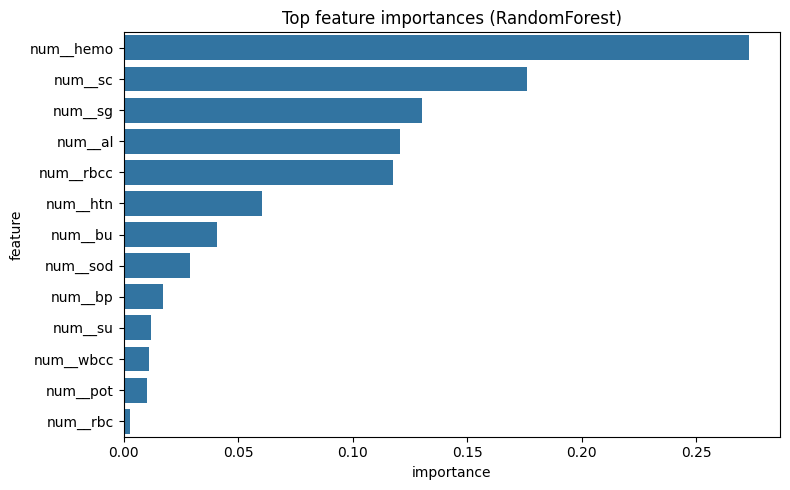

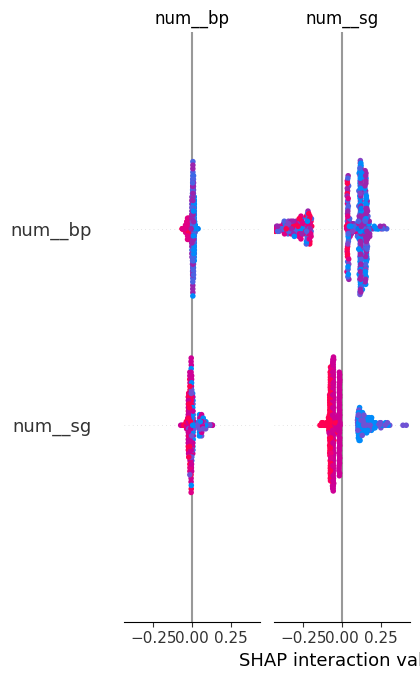

Skipping LIME explanations.

Top numeric feature selected for PDP: num__hemo


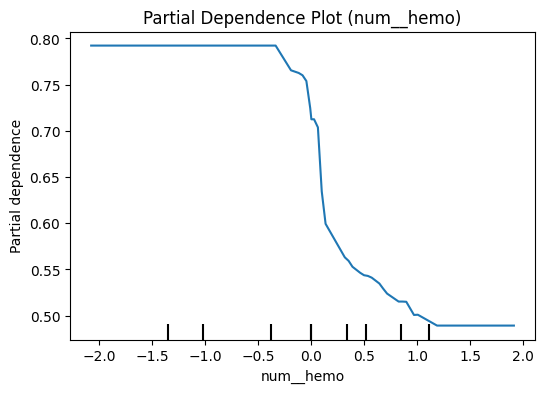

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
try:
    import shap
    HAS_SHAP = True
except ImportError:
    HAS_SHAP = False
    print("SHAP not installed. Install shap for SHAP explanations.")

try:
    import lime
    import lime.lime_tabular
    HAS_LIME = True
except ImportError:
    HAS_LIME = False
    print("LIME not installed. Install lime for LIME explanations.")


rf = results['RandomForest']['model']
# Use the feature_names generated by the preprocessor in the preprocessing step
# It correctly handles cases where there are no categorical features.
feature_names = preprocessor.get_feature_names_out()

if hasattr(rf, 'feature_importances_'):
    importances = rf.feature_importances_
    fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
    print("\nTop features by RandomForest importance:")
    print(fi_df.head(10))


    plt.figure(figsize=(8,5))
    sns.barplot(x='importance', y='feature', data=fi_df.head(15))
    plt.title('Top feature importances (RandomForest)')
    plt.tight_layout()
    plt.show()
else:
    print("RandomForest has no feature_importances_ attribute.")


if HAS_SHAP:
    X_train_shap = X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc
    X_train_shap = X_train_shap.astype(float)

    explainer = shap.TreeExplainer(rf)
    sample_idx = np.random.choice(X_train_shap.shape[0], min(500, X_train_shap.shape[0]), replace=False)
    X_sample = X_train_shap[sample_idx]

    shap_values = explainer.shap_values(X_sample)
    shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=True)
else:
    print("Skipping SHAP explanations.")


if HAS_LIME:
    X_train_lime = X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(
        X_train_lime,
        feature_names=feature_names,
        class_names=['notckd','ckd'],
        discretize_continuous=True
    )
    idx = 0
    X_test_lime = X_test_proc.toarray() if hasattr(X_test_proc, "toarray") else X_test_proc
    exp = explainer_lime.explain_instance(X_test_lime[idx], rf.predict_proba, num_features=10)
    print("\nLIME explanation for one instance:")
    print(exp.as_list())
else:
    print("Skipping LIME explanations.")


top_numeric_feat = None
for f in fi_df['feature']:
    # Remove the 'num__' prefix when checking against original num_features for clarity
    original_feat_name = f.replace('num__', '')
    if original_feat_name in num_features:
        top_numeric_feat = f
        break

if top_numeric_feat is not None:
    print("\nTop numeric feature selected for PDP:", top_numeric_feat)
    fig, ax = plt.subplots(figsize=(6,4))
    try:
        # Ensure X_test_proc is dense if it's a sparse matrix for PDP
        X_test_proc_dense = X_test_proc.toarray() if hasattr(X_test_proc, "toarray") else X_test_proc
        feature_index = list(feature_names).index(top_numeric_feat)
        PartialDependenceDisplay.from_estimator(rf, X_test_proc_dense, [feature_index], feature_names=feature_names, ax=ax)
        plt.title(f'Partial Dependence Plot ({top_numeric_feat})')
        plt.show()
    except Exception as e:
        print("PDP plotting error:", e)
else:
    print("No numeric feature found for PDP.")

Part 6: Comparative Analysis

In [ ]:
import pandas as pd


rows = []

for name, val in results.items():
    m = val['metrics']
    rows.append({
        'Model': name,
        'Accuracy': m['accuracy'],
        'Precision': m['precision'],
        'Recall': m['recall'],
        'F1-score': m['f1'],
        'ROC-AUC': m['roc_auc']
    })


try:
    # MLP
    rows.append({
        'Model': 'MLP',
        'Accuracy': accuracy_score(y_test, preds_mlp),
        'Precision': precision_score(y_test, preds_mlp, zero_division=0),
        'Recall': recall_score(y_test, preds_mlp, zero_division=0),
        'F1-score': f1_score(y_test, preds_mlp, zero_division=0),
        'ROC-AUC': None
    })
    # CNN
    rows.append({
        'Model': 'CNN',
        'Accuracy': accuracy_score(y_test, preds_cnn),
        'Precision': precision_score(y_test, preds_cnn, zero_division=0),
        'Recall': recall_score(y_test, preds_cnn, zero_division=0),
        'F1-score': f1_score(y_test, preds_cnn, zero_division=0),
        'ROC-AUC': None
    })
    # LSTM
    rows.append({
        'Model': 'LSTM',
        'Accuracy': accuracy_score(y_test, preds_lstm),
        'Precision': precision_score(y_test, preds_lstm, zero_division=0),
        'Recall': recall_score(y_test, preds_lstm, zero_division=0),
        'F1-score': f1_score(y_test, preds_lstm, zero_division=0),
        'ROC-AUC': None
    })
except Exception:
    pass

res_df = pd.DataFrame(rows).sort_values('F1-score', ascending=False)
print("\n=== Model Comparison Table ===")
display(res_df)


res_df.to_csv('model_comparison_results.csv', index=False)
print("\nSaved model_comparison_results.csv")


report = []
report.append("# CKD ML/DL Model Comparison Report")
report.append("")
report.append("## Dataset & Preprocessing")
report.append("- Dataset: kidney_disease.csv")
report.append("- Preprocessing: Median imputation (numeric), most frequent (categorical), StandardScaler, OneHotEncoder")
report.append("- Train/Test split: 80/20")
report.append("")
report.append("## Model Performance (sorted by F1-score)")
report.append(res_df.to_markdown(index=False))
report.append("")


report.append("## Top Features from RandomForest")
if 'fi_df' in globals():
    report.append(fi_df.head(10).to_markdown(index=False))
report.append("")


report.append("## XAI Insights")
report.append("- RandomForest feature importances plotted above.")
report.append("- SHAP analysis (if installed) shows global feature impact.")
report.append("- LIME (if installed) provides local explanations for individual predictions.")
report.append("- PDP shows effect of top numeric feature on model prediction.")
report.append("")


report.append("## Recommendation")
report.append("- Choose model balancing performance and interpretability.")
report.append("- RandomForest or GradientBoosting often offer good trade-offs for tabular medical data.")
report.append("- LogisticRegression is interpretable and reliable for smaller datasets.")
report.append("- Deep Learning models (MLP/CNN/LSTM) may help if dataset is large and complex.")
report.append("")


report_md = "\n".join(report)
with open('ckd_model_report.md','w') as f:
    f.write(report_md)
print("Saved ckd_model_report.md")


try:
    from docx import Document
    doc = Document()
    for line in report_md.split("\n"):
        doc.add_paragraph(line)
    doc.save('ckd_model_report.docx')
    print("Saved ckd_model_report.docx")
except Exception:
    print("python-docx not available; convert md to docx manually.")



=== Model Comparison Table ===


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
2,RandomForest,1.0000,1.000000,1.00,1.000000,1.000000
5,GradientBoosting,0.9875,1.000000,0.98,0.989899,1.000000
0,LogisticRegression,0.9750,1.000000,0.96,0.979592,0.998000
4,KNN,0.9750,1.000000,0.96,0.979592,0.988667
3,SVM,0.9750,1.000000,0.96,0.979592,0.998667
7,CNN,0.9750,1.000000,0.96,0.979592,NaN
1,DecisionTree,0.9625,0.979592,0.96,0.969697,0.963333
6,MLP,0.9625,0.979592,0.96,0.969697,NaN
8,LSTM,0.9125,0.938776,0.92,0.929293,NaN



Saved model_comparison_results.csv
Saved ckd_model_report.md
python-docx not available; convert md to docx manually.
